In [1]:
import json
import os
from pathlib import Path
import pandas as pd
base = Path(os.getcwd())
model_info_file_path = base/'data'/'model_data'/'models_info.json'
extracted_data_file_path = base/'data'/'model_data'/'extracted_dataset_samples.jsonl'
feature_vectors_file_path = base/'data'/'feature_vectors'/'ID'/'data_samples_features.jsonl'
model_info = pd.read_json(model_info_file_path).T
extracted_data = pd.read_json(extracted_data_file_path, lines=True)
feature_vectors = pd.read_json(feature_vectors_file_path, lines=True)

Create Query ID to query feature DF

In [2]:
feature_vectors

,query_id,query,feature_vector,dataset
0,bbh_q0,not ( True ) and ( True ) is,"[0.999993681907653, 2.68437997874571e-06, 3.54...",bbh
1,bbh_q1,not True or False or ( False ) is,"[0.9999901056289671, 4.502644060266903e-06, 5....",bbh
2,bbh_q2,True or not False and True and False is,"[0.9999886751174921, 4.963138053426519e-06, 6....",bbh
3,bbh_q3,not True and ( False or True ) is,"[0.999993205070495, 2.932409415734582e-06, 3.8...",bbh
4,bbh_q4,not True or ( False and True ) is,"[0.999993443489074, 2.847306177500286e-06, 3.6...",bbh
...,...,...,...,...
18700,mmlu_pro_q11640,A hot mild steel rod is placed in a carbonaceo...,"[1.0312172094018019e-07, 5.0701830332400284e-0...",mmlu_pro
18701,mmlu_pro_q11641,Consider the evaporation of liquid ammonia int...,"[7.761179290355358e-07, 0.000261560897342, 0.9...",mmlu_pro
18702,mmlu_pro_q11642,The frequency range of a commercially broadcas...,"[2.3169583585058707e-07, 9.768966265255587e-05...",mmlu_pro
18703,mmlu_pro_q11643,Suppose there are 100 identical firms in a per...,"[8.748482116516243e-08, 4.565488416119478e-05,...",mmlu_pro


In [3]:
query_feature_map_df  = feature_vectors[['query_id', 'feature_vector']]
query_feature_map_df = query_feature_map_df.rename(columns={"feature_vector": "query_feature_vector"})
query_feature_map_df

,query_id,query_feature_vector
0,bbh_q0,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
1,bbh_q1,"[0.9999901056289671, 4.502644060266903e-06, 5...."
2,bbh_q2,"[0.9999886751174921, 4.963138053426519e-06, 6...."
3,bbh_q3,"[0.999993205070495, 2.932409415734582e-06, 3.8..."
4,bbh_q4,"[0.999993443489074, 2.847306177500286e-06, 3.6..."
...,...,...
18700,mmlu_pro_q11640,"[1.0312172094018019e-07, 5.0701830332400284e-0..."
18701,mmlu_pro_q11641,"[7.761179290355358e-07, 0.000261560897342, 0.9..."
18702,mmlu_pro_q11642,"[2.3169583585058707e-07, 9.768966265255587e-05..."
18703,mmlu_pro_q11643,"[8.748482116516243e-08, 4.565488416119478e-05,..."


Create model_feature_vector with model_co2_cost DF

In [4]:
extracted_data

,query,answer,model,dataset,subset,correct,query_id
0,not ( True ) and ( True ) is,False,MaziyarPanahi/calme-3.2-instruct-78b,bbh,boolean_expressions,1,bbh_q0
1,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-32B-Instruct,bbh,boolean_expressions,1,bbh_q0
2,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-72B-Instruct,bbh,boolean_expressions,1,bbh_q0
3,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-14B-Instruct,bbh,boolean_expressions,1,bbh_q0
4,not ( True ) and ( True ) is,False,Qwen/Qwen2.5-7B-Instruct,bbh,boolean_expressions,1,bbh_q0
...,...,...,...,...,...,...,...
305867,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,mmlu_pro,None,0,mmlu_pro_q11642
305868,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,mmlu_pro,None,0,mmlu_pro_q11642
305869,The frequency range of a commercially broadcas...,F,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,mmlu_pro,None,0,mmlu_pro_q11642
305870,Suppose there are 100 identical firms in a per...,A,meta-llama/Llama-3.1-70B-Instruct,mmlu_pro,None,0,mmlu_pro_q11643


In [5]:
query_id_model_correct_df = extracted_data[['query_id', 'model', 'correct','dataset']]
query_id_model_correct_df

,query_id,model,correct,dataset
0,bbh_q0,MaziyarPanahi/calme-3.2-instruct-78b,1,bbh
1,bbh_q0,Qwen/Qwen2.5-32B-Instruct,1,bbh
2,bbh_q0,Qwen/Qwen2.5-72B-Instruct,1,bbh
3,bbh_q0,Qwen/Qwen2.5-14B-Instruct,1,bbh
4,bbh_q0,Qwen/Qwen2.5-7B-Instruct,1,bbh
...,...,...,...,...
305867,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,0,mmlu_pro
305868,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,0,mmlu_pro
305869,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,0,mmlu_pro
305870,mmlu_pro_q11643,meta-llama/Llama-3.1-70B-Instruct,0,mmlu_pro


In [6]:
model_info_feature_cost = model_info[['feature_vector', 'co2_cost']]
model_info_feature_cost = model_info_feature_cost.rename(columns={"feature_vector": "model_feature_vector", "co2_cost": "model_co2_cost"})
model_info_feature_cost

,model_feature_vector,model_co2_cost
MaziyarPanahi/calme-3.2-instruct-78b,"[0.729734421107446, 0.399546827794561, 0.73030...",66.01
Qwen/Qwen2.5-0.5B-Instruct,"[0.330671758375282, 0.089879154078549, 0.17195...",1.24
Qwen/Qwen2.5-1.5B-Instruct,"[0.42475264710987604, 0.204682779456193, 0.279...",1.37
Qwen/Qwen2.5-14B-Instruct,"[0.637389342128102, 0.5377643504531721, 0.4904...",3.55
Qwen/Qwen2.5-32B-Instruct,"[0.6873806630793261, 0.6170694864048331, 0.566...",11.5
Qwen/Qwen2.5-3B-Instruct,"[0.46554417635827106, 0.358006042296072, 0.325...",2.78
Qwen/Qwen2.5-72B-Instruct,"[0.725568477694844, 0.589123867069486, 0.56258...",47.65
Qwen/Qwen2.5-7B-Instruct,"[0.5368859572990801, 0.48564954682779404, 0.42...",3.24
deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,"[0.59121680263843, 0.5944108761329301, 0.46667...",3.99
deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,"[0.417635827113348, 0.43429003021148005, 0.468...",47.28


Merge three DF to create final training data Frame

In [7]:
#merge model_feature_vector_map with query_id_model_correct_df on model name
merged_df_model_feature = pd.merge(query_id_model_correct_df, model_info_feature_cost, left_on='model', right_index=True)
merged_df_model_feature

,query_id,model,correct,dataset,model_feature_vector,model_co2_cost
0,bbh_q0,MaziyarPanahi/calme-3.2-instruct-78b,1,bbh,"[0.729734421107446, 0.399546827794561, 0.73030...",66.01
1,bbh_q0,Qwen/Qwen2.5-32B-Instruct,1,bbh,"[0.6873806630793261, 0.6170694864048331, 0.566...",11.5
2,bbh_q0,Qwen/Qwen2.5-72B-Instruct,1,bbh,"[0.725568477694844, 0.589123867069486, 0.56258...",47.65
3,bbh_q0,Qwen/Qwen2.5-14B-Instruct,1,bbh,"[0.637389342128102, 0.5377643504531721, 0.4904...",3.55
4,bbh_q0,Qwen/Qwen2.5-7B-Instruct,1,bbh,"[0.5368859572990801, 0.48564954682779404, 0.42...",3.24
...,...,...,...,...,...,...
305867,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,0,mmlu_pro,"[0.59121680263843, 0.5944108761329301, 0.46667...",3.99
305868,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,0,mmlu_pro,"[0.417635827113348, 0.43429003021148005, 0.468...",47.28
305869,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,0,mmlu_pro,"[0.34108661690678704, 0.43202416918429004, 0.2...",1.37
305870,mmlu_pro_q11643,meta-llama/Llama-3.1-70B-Instruct,0,mmlu_pro,"[0.6799166811317481, 0.379909365558912, 0.5337...",40.22


In [8]:
#final merge on query_id to get query feature vector
final_feature_df = pd.merge(merged_df_model_feature, query_feature_map_df, left_on='query_id', right_on='query_id')
final_feature_df

,query_id,model,correct,dataset,model_feature_vector,model_co2_cost,query_feature_vector
0,bbh_q0,MaziyarPanahi/calme-3.2-instruct-78b,1,bbh,"[0.729734421107446, 0.399546827794561, 0.73030...",66.01,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
1,bbh_q0,Qwen/Qwen2.5-32B-Instruct,1,bbh,"[0.6873806630793261, 0.6170694864048331, 0.566...",11.5,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
2,bbh_q0,Qwen/Qwen2.5-72B-Instruct,1,bbh,"[0.725568477694844, 0.589123867069486, 0.56258...",47.65,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
3,bbh_q0,Qwen/Qwen2.5-14B-Instruct,1,bbh,"[0.637389342128102, 0.5377643504531721, 0.4904...",3.55,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
4,bbh_q0,Qwen/Qwen2.5-7B-Instruct,1,bbh,"[0.5368859572990801, 0.48564954682779404, 0.42...",3.24,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
...,...,...,...,...,...,...,...
305867,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,0,mmlu_pro,"[0.59121680263843, 0.5944108761329301, 0.46667...",3.99,"[2.3169583585058707e-07, 9.768966265255587e-05..."
305868,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,0,mmlu_pro,"[0.417635827113348, 0.43429003021148005, 0.468...",47.28,"[2.3169583585058707e-07, 9.768966265255587e-05..."
305869,mmlu_pro_q11642,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,0,mmlu_pro,"[0.34108661690678704, 0.43202416918429004, 0.2...",1.37,"[2.3169583585058707e-07, 9.768966265255587e-05..."
305870,mmlu_pro_q11643,meta-llama/Llama-3.1-70B-Instruct,0,mmlu_pro,"[0.6799166811317481, 0.379909365558912, 0.5337...",40.22,"[8.748482116516243e-08, 4.565488416119478e-05,..."


Binary Classificaiton

In [ ]:
#training set
training_df = final_feature_df[['query_feature_vector', 'model_feature_vector', 'correct', 'dataset']]
training_df

,query_feature_vector,model_feature_vector,correct,dataset
0,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.729734421107446, 0.399546827794561, 0.73030...",1,bbh
1,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.6873806630793261, 0.6170694864048331, 0.566...",1,bbh
2,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.725568477694844, 0.589123867069486, 0.56258...",1,bbh
3,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.637389342128102, 0.5377643504531721, 0.4904...",1,bbh
4,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.5368859572990801, 0.48564954682779404, 0.42...",1,bbh
...,...,...,...,...
305867,"[2.3169583585058707e-07, 9.768966265255587e-05...","[0.59121680263843, 0.5944108761329301, 0.46667...",0,mmlu_pro
305868,"[2.3169583585058707e-07, 9.768966265255587e-05...","[0.417635827113348, 0.43429003021148005, 0.468...",0,mmlu_pro
305869,"[2.3169583585058707e-07, 9.768966265255587e-05...","[0.34108661690678704, 0.43202416918429004, 0.2...",0,mmlu_pro
305870,"[8.748482116516243e-08, 4.565488416119478e-05,...","[0.6799166811317481, 0.379909365558912, 0.5337...",0,mmlu_pro


In [ ]:
#create Startified key
training_df['stratify_key'] = training_df['correct'].astype(str) + "_" + training_df['dataset'].astype(str)
training_df


C:\Users\S8772\AppData\Local\Temp\ipykernel_19460\1791742944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['stratify_key'] = training_df['correct'].astype(str) + "_" + training_df['dataset'].astype(str)


,query_feature_vector,model_feature_vector,correct,dataset,stratify_key
0,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.729734421107446, 0.399546827794561, 0.73030...",1,bbh,1_bbh
1,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.6873806630793261, 0.6170694864048331, 0.566...",1,bbh,1_bbh
2,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.725568477694844, 0.589123867069486, 0.56258...",1,bbh,1_bbh
3,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.637389342128102, 0.5377643504531721, 0.4904...",1,bbh,1_bbh
4,"[0.999993681907653, 2.68437997874571e-06, 3.54...","[0.5368859572990801, 0.48564954682779404, 0.42...",1,bbh,1_bbh
...,...,...,...,...,...
305867,"[2.3169583585058707e-07, 9.768966265255587e-05...","[0.59121680263843, 0.5944108761329301, 0.46667...",0,mmlu_pro,0_mmlu_pro
305868,"[2.3169583585058707e-07, 9.768966265255587e-05...","[0.417635827113348, 0.43429003021148005, 0.468...",0,mmlu_pro,0_mmlu_pro
305869,"[2.3169583585058707e-07, 9.768966265255587e-05...","[0.34108661690678704, 0.43202416918429004, 0.2...",0,mmlu_pro,0_mmlu_pro
305870,"[8.748482116516243e-08, 4.565488416119478e-05,...","[0.6799166811317481, 0.379909365558912, 0.5337...",0,mmlu_pro,0_mmlu_pro


In [ ]:
feature_set = training_df[['query_feature_vector', 'model_feature_vector']]
target_set = training_df['correct']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.2, random_state=42, stratify=training_df['stratify_key'])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

Generate Dataset for training

In [ ]:
class QueryModelDataset(torch.utils.data.Dataset):
    def __init__(self, query, model,outputs):
        self.query = query
        self.model = model
        self.outputs = outputs

    def __len__(self):
        return len(self.query)

    def __getitem__(self, idx):
        q = torch.tensor(self.query.iloc[idx], dtype=torch.float32)
        m = torch.tensor(self.model.iloc[idx], dtype=torch.float32)
        o = torch.tensor(self.outputs.iloc[idx], dtype=torch.float32)

        return q, m, o

In [ ]:
train_dataset = QueryModelDataset(X_train["query_feature_vector"], X_train["model_feature_vector"], y_train)
test_dataset = QueryModelDataset(X_test["query_feature_vector"], X_test["model_feature_vector"], y_test)

In [ ]:
query_len = X_train["query_feature_vector"].iloc[0].__len__()
model_feature_len = X_train["model_feature_vector"].iloc[0].__len__()


Dataloader

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Model

In [ ]:
#simple MLP should work
class RouterNN(nn.Module):
    def __init__(self, query_vector,model_vector,projection_dim =32, hidden_size=(256,128), dropout_rate=0.1, output_size=1):
        super(RouterNN, self).__init__()
        self.q_proj = nn.Sequential(
            nn.Linear((query_vector), projection_dim),
            nn.ReLU(),
        )
        self.m_proj = nn.Sequential(
            nn.Linear((model_vector), projection_dim),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(projection_dim*4 + 1, hidden_size[0]),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size[0], hidden_size[1]),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size[1], output_size)
        )


    def forward(self, query,model):
        q_emb = self.q_proj(query)
        m_emb = self.m_proj(model)

        prod = q_emb * m_emb
        diff  = torch.abs(q_emb - m_emb)
        cos = nn.functional.cosine_similarity(q_emb, m_emb, dim=1, eps=1e-8).unsqueeze(1)

        x = torch.cat((q_emb, m_emb, prod, diff, cos), dim=1)
        out = self.fc_layers(x)



        return out

Train function

In [ ]:
from tqdm import tqdm

In [ ]:

model = RouterNN(query_vector=query_len,model_vector=model_feature_len, projection_dim=32, hidden_size=(256,128), dropout_rate=0.1, output_size=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=5e-4 )
pos = float((y_train==1).sum())
neg = float((y_train==0).sum())
pos_weight = torch.tensor([neg/pos],dtype=torch.float32).to(device)

loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
num_epochs = 10
train_loss_history = []
train_accuracy_history = []
validation_loss_history = []
validation_accuracy_history = []

all_logits = []
all_y = []

best_val_logits = []
best_val_y = []

best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    train_correct = 0
    train_total = 0

    tqdm_iterator = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

    for query, model_features, labels in tqdm_iterator:
        query = query.to(device)
        model_features = model_features.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        logits = model(query, model_features)
        target = labels.float().unsqueeze(1)
        loss = loss_fn(logits, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()*query.size(0)
        probs = torch.sigmoid(logits)

        predicted = (probs >= 0.5).float()
        train_total += target.size(0)
        train_correct += (predicted == target).sum().item()
        tqdm_iterator.set_postfix(loss=loss.item(), accuracy=train_correct/train_total if train_total > 0 else 0)
    epoch_loss = running_loss / train_total
    epoch_accuracy = train_correct / train_total
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)

    model.eval()
    val_total = 0
    val_correct = 0
    val_running_loss = 0.0

    val_logits_epoch = []
    target_epoch = []



    val_tqdm_iterator = tqdm(test_dataloader, desc=f'Validation Epoch {epoch+1}/{num_epochs}', unit='batch')
    with torch.no_grad():
        for query, model_features, labels in val_tqdm_iterator:
            query = query.to(device)
            model_features = model_features.to(device)
            labels = labels.to(device)
            logits = model(query, model_features)
            target = labels.float().unsqueeze(1)
            loss = loss_fn(logits, target)
            val_running_loss += loss.item()*query.size(0)
            all_logits.extend(logits.cpu().numpy())
            all_y.extend(target.cpu().numpy())
            val_logits_epoch.extend(logits.cpu().numpy())
            target_epoch.extend(target.cpu().numpy())

            probs = torch.sigmoid(logits)
            predicted = (probs >= 0.5).float()
            val_total += target.size(0)
            val_correct += (predicted == target).sum().item()
            val_tqdm_iterator.set_postfix(loss=loss.item(), accuracy=val_correct/val_total if val_total > 0 else 0)
    val_epoch_loss = val_running_loss / val_total
    val_epoch_accuracy = val_correct / val_total
    validation_loss_history.append(val_epoch_loss)
    validation_accuracy_history.append(val_epoch_accuracy)

    if val_epoch_accuracy > best_val_accuracy:
        best_val_accuracy = val_epoch_accuracy
        best_val_logits = val_logits_epoch
        best_val_y = target_epoch
        torch.save(model.state_dict(), 'best_router_model.pth')
        print(f"Best model saved with validation accuracy: {best_val_accuracy:.4f}")


Validation Epoch 1/10: 100%|██████████| 1912/1912 [00:05<00:00, 355.73batch/s, accuracy=0.791, loss=0.609]


Best model saved with validation accuracy: 0.7907


Validation Epoch 3/10: 100%|██████████| 1912/1912 [00:05<00:00, 362.40batch/s, accuracy=0.792, loss=0.588]


Best model saved with validation accuracy: 0.7925


Validation Epoch 6/10: 100%|██████████| 1912/1912 [00:05<00:00, 373.18batch/s, accuracy=0.793, loss=0.572]


Best model saved with validation accuracy: 0.7927


Validation Epoch 10/10: 100%|██████████| 1912/1912 [00:05<00:00, 349.02batch/s, accuracy=0.787, loss=0.585]


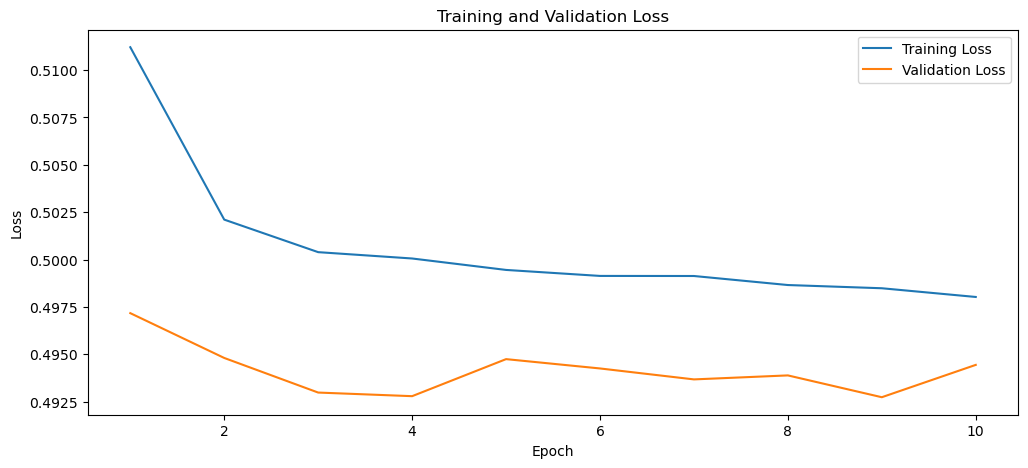

In [ ]:
#plot training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs+1), validation_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


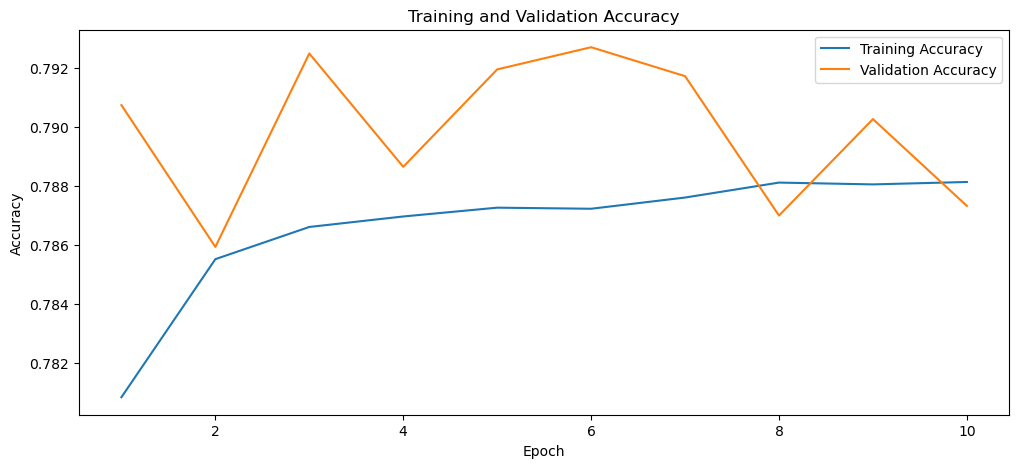

In [ ]:
#plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), validation_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

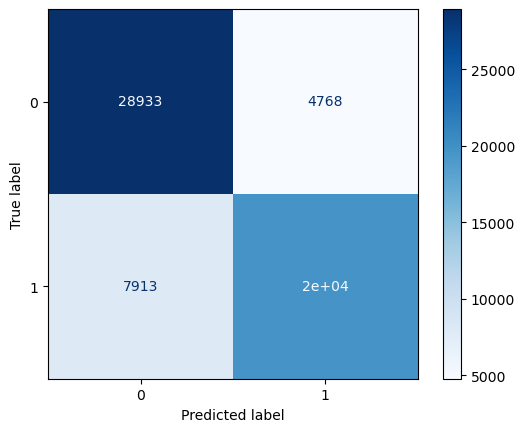

In [ ]:
#confusion matrix on test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
probs = torch.sigmoid(torch.tensor(best_val_logits))
predicted = (probs >= 0.5).int().numpy()
all_y = np.array(best_val_y).astype(int)

cm = confusion_matrix(all_y, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)






In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
print("ROC-AUC:", roc_auc_score(np.array(best_val_y), best_val_logits))
print("PR-AUC :", average_precision_score(np.array(best_val_y), best_val_logits))
print(classification_report(np.array(best_val_y), (np.array(best_val_logits)>=0.0).astype(int), digits=4))

ROC-AUC: 0.8707221996975025
PR-AUC : 0.8578127009131923
              precision    recall  f1-score   support

         0.0     0.7852    0.8585    0.8202     33701
         1.0     0.8040    0.7120    0.7552     27474

    accuracy                         0.7927     61175
   macro avg     0.7946    0.7853    0.7877     61175
weighted avg     0.7937    0.7927    0.7910     61175



Infer Test

Query Vector

In [ ]:
input_query = query_feature_map_df.iloc[0:5]
input_query

,query_id,query_feature_vector
0,bbh_q0,"[0.999993681907653, 2.68437997874571e-06, 3.54..."
1,bbh_q1,"[0.9999901056289671, 4.502644060266903e-06, 5...."
2,bbh_q2,"[0.9999886751174921, 4.963138053426519e-06, 6...."
3,bbh_q3,"[0.999993205070495, 2.932409415734582e-06, 3.8..."
4,bbh_q4,"[0.999993443489074, 2.847306177500286e-06, 3.6..."


In [ ]:
input_query_vectors = np.array(input_query['query_feature_vector'].tolist())
input_query_vectors

array([[9.99993682e-01, 2.68437998e-06, 3.54526765e-06, 8.18964317e-02],
       [9.99990106e-01, 4.50264406e-06, 5.32739523e-06, 2.43573874e-01],
       [9.99988675e-01, 4.96313805e-06, 6.28085581e-06, 2.20619589e-01],
       [9.99993205e-01, 2.93240942e-06, 3.80049482e-06, 1.24829940e-01],
       [9.99993443e-01, 2.84730618e-06, 3.68617816e-06, 1.79287761e-01]])

Model Vectors

In [ ]:
model_info_feature_cost

,model_feature_vector,model_co2_cost
MaziyarPanahi/calme-3.2-instruct-78b,"[0.729734421107446, 0.399546827794561, 0.73030...",66.01
Qwen/Qwen2.5-0.5B-Instruct,"[0.330671758375282, 0.089879154078549, 0.17195...",1.24
Qwen/Qwen2.5-1.5B-Instruct,"[0.42475264710987604, 0.204682779456193, 0.279...",1.37
Qwen/Qwen2.5-14B-Instruct,"[0.637389342128102, 0.5377643504531721, 0.4904...",3.55
Qwen/Qwen2.5-32B-Instruct,"[0.6873806630793261, 0.6170694864048331, 0.566...",11.5
Qwen/Qwen2.5-3B-Instruct,"[0.46554417635827106, 0.358006042296072, 0.325...",2.78
Qwen/Qwen2.5-72B-Instruct,"[0.725568477694844, 0.589123867069486, 0.56258...",47.65
Qwen/Qwen2.5-7B-Instruct,"[0.5368859572990801, 0.48564954682779404, 0.42...",3.24
deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,"[0.59121680263843, 0.5944108761329301, 0.46667...",3.99
deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,"[0.417635827113348, 0.43429003021148005, 0.468...",47.28


In [ ]:
model_feature_and_cost = model_info_feature_cost[['model_feature_vector', 'model_co2_cost']]
model_feature_and_cost

,model_feature_vector,model_co2_cost
MaziyarPanahi/calme-3.2-instruct-78b,"[0.729734421107446, 0.399546827794561, 0.73030...",66.01
Qwen/Qwen2.5-0.5B-Instruct,"[0.330671758375282, 0.089879154078549, 0.17195...",1.24
Qwen/Qwen2.5-1.5B-Instruct,"[0.42475264710987604, 0.204682779456193, 0.279...",1.37
Qwen/Qwen2.5-14B-Instruct,"[0.637389342128102, 0.5377643504531721, 0.4904...",3.55
Qwen/Qwen2.5-32B-Instruct,"[0.6873806630793261, 0.6170694864048331, 0.566...",11.5
Qwen/Qwen2.5-3B-Instruct,"[0.46554417635827106, 0.358006042296072, 0.325...",2.78
Qwen/Qwen2.5-72B-Instruct,"[0.725568477694844, 0.589123867069486, 0.56258...",47.65
Qwen/Qwen2.5-7B-Instruct,"[0.5368859572990801, 0.48564954682779404, 0.42...",3.24
deepseek-ai/DeepSeek-R1-Distill-Qwen-14B,"[0.59121680263843, 0.5944108761329301, 0.46667...",3.99
deepseek-ai/DeepSeek-R1-Distill-Qwen-32B,"[0.417635827113348, 0.43429003021148005, 0.468...",47.28


In [ ]:
alpha = 0.5

Score

In [ ]:
#Need to nomalize co2 cost in order to avoid complete lead by co2 cost
cost_min = model_feature_and_cost['model_co2_cost'].min()
cost_max = model_feature_and_cost['model_co2_cost'].max()


In [ ]:
query_score_model = {}
for model_name, model_vector, co2_cost in model_feature_and_cost.itertuples(index=True):
    for query_id, input_query_vector in input_query.itertuples(index=False):
        input_query_tensor = torch.tensor(input_query_vector, dtype=torch.float32).unsqueeze(0).to(device)
        model_vector_tensor = torch.tensor(model_vector, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            logit = model(input_query_tensor, model_vector_tensor)
            prob_correct = torch.sigmoid(logit).item()

            #normalize co2 cost
            co2_cost_norm = (co2_cost - cost_min) / (cost_max - cost_min)
            score = (1 - alpha)  * prob_correct - alpha * co2_cost_norm
            query_score_model.setdefault(query_id, []).append({"model_name": model_name, "score": score, "prob_correct": prob_correct, "co2_cost": co2_cost})






In [ ]:
query_id = "bbh_q0"
best = max(query_score_model[query_id], key=lambda x: x['score'])
best_model = best['model_name']
best_model

'meta-llama/Llama-3.1-8B-Instruct'